6.13

In [ ]:
# %load 6.13.py
import numpy as np
import matplotlib.pyplot as plt;

# data input
csvname = 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1, :]
y = data[-1:, :]
#print('x:',x.shape)
#print('y:',y.shape)

q=x.shape[1]
col=np.ones((1,q))
x_1=np.r_[col,x]
x_1=np.mat(x_1)
#print('x_1:',x_1.shape)

y=np.mat(y.T)
s=x_1.shape[0]
w=np.ones((1,s))
w = np.mat(w)
#print('w:',w.shape)

iterations=600
alpha=0.1
alpha_p=0.05
ite=np.zeros(iterations)
sm_cost=np.zeros(iterations)
p_cost=np.zeros(iterations)

def model(x,w):
    a=np.matmul(w,x)
    return a.T

def softmax(w):
    temp=np.matmul(w,x_1)
    cost=np.sum(np.log(1+np.exp(np.multiply(-y.T,temp))))
    return cost/float(np.size(y))


def gradient(w):
    vector = np.zeros([9, 1])
    for i in range(np.size(y)):
        temp=np.exp(-y[i,0]*np.dot(w,x_1[:,i]))
        temp1=temp/(1+temp)*y[i,0]
        #print(temp1)
        vector=vector+temp1[0,0]*x_1[:,i]

    return -vector/float(np.size(y))

def SoftMaxIte(w):

    for i in range(iterations):
      ite[i]=i
      grad=gradient(w)
      sm_cost[i] = softmax(w)
      w=w-alpha*grad.T
    return w

def PerceptronCostFunction(w):
    cost = 0
    for i in range(np.size(y)):
        temp=-y[i,0]*np.dot(w,x_1[:,i])
        if (temp>0):
            cost=cost+temp
        else:
            cost=cost
    return cost / float(np.size(y))

def GradientOfPerceptron(w):
    vector=np.zeros([9,1])
    for i in range(np.size(y)):
        temp = -y[i, 0] * np.dot(w, x_1[:, i])
        if(temp>0):
            vector=vector+(-y[i,0])*x_1[:,i]
        else:
            vector=vector
    return vector/float(np.size(y))

def PerceptronIte(w):
    for i in range(iterations):
        ite[i] = i
        grad = GradientOfPerceptron(w)
        p_cost[i] = PerceptronCostFunction(w)
        w = w - alpha_p * grad.T
    return w

w_for_softmax=SoftMaxIte(w)
#print('w for softmax:',w_for_softmax)


w_for_perceptron=PerceptronIte(w)
#print('w for perceptron:',w_for_perceptron)

yPredictSM = model(x_1, w_for_softmax)
Multiplication = np.multiply(yPredictSM, y)
wrong=0

yPredictP = model(x_1, w_for_perceptron)
Multiplication_P = np.multiply(yPredictP, y)
wrong_P=0

for j in range(Multiplication.size):
    if (Multiplication[j, 0] < 0):
        wrong = wrong + 1
    if (Multiplication_P[j, 0] < 0):
        wrong_P = wrong_P + 1
print('Wrong Predictions for Softmax:', wrong)
print('Wrong Predictions for Perceptron:', wrong_P)
#print(sm_cost)
plt.plot(ite, sm_cost,label="Softmax Cost Function",color="#F08080")
plt.plot(ite, p_cost,label="Percptron Cost Function")

plt.legend(loc="upper right")
plt.show()




Wrong Predictions for Softmax: 25
Wrong Predictions for Perceptron: 25


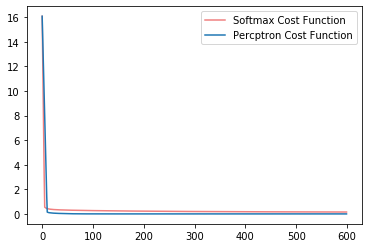

In [9]:
%run 6.13.py

6.15

In [ ]:
# %load 6.15.py
import numpy as np
import matplotlib.pyplot as plt;
# load in dataset
csvname = 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))
s=x.shape[1]
r=np.ones([1,s])
w=np.ones([1,x.shape[0]+1])
iterations=12000
ite=np.zeros(iterations)
p_cost=np.zeros(iterations)
alpha=0.00005

for i in range(x.shape[0]):
    mean=np.mean(x[i,:])
    std=np.std(x[i,:])
    x[i,:]=(x[i,:]-mean)/std

x=np.mat(np.r_[r,x])
y=np.mat(y)

weights=[]
for i in range(np.size(y)):
    if y[0,i]>0:
        weights.append(5)
    else:
        weights.append(30)

#Perceptron
def model(x,w):
    a=np.matmul(w,x)
    return a.T

def PerceptronCostFunction(w):
    cost = 0
    for i in range(np.size(y)):
        temp=-y[0,i]*np.dot(w,x[:,i])
        if (temp[0,0]>0):
            cost=cost+weights[i]*temp[0,0]
        else:
            cost=cost
    return cost / float(np.size(y))

def GradientOfPerceptron(w):
    vector=np.zeros([1,s])
    for i in range(np.size(y)):
        #print(w.shape)
        #print(x[:,i].shape)
        #print(np.dot(w, x[:, i]).shape)
        temp = -y[0, i] * np.dot(w, x[:, i])
        #print(temp.shape)
        if(temp[0,0]>0):
            vector=vector+weights[i]*(-y[0,i])*x[:,i]
        else:
            vector=vector
    return vector/float(np.size(y))

def PerceptronIte(w):
    for i in range(iterations):
        ite[i] = i
        grad = GradientOfPerceptron(w)
        p_cost[i] = PerceptronCostFunction(w)
        w = w - alpha * grad.T
    return w

w=PerceptronIte(w)
yPredictions=np.matmul(w,x)
TP=0
TN=0
FP=0
FN=0

for i in range(np.size(y)):
    if (y[0,i]>=0) and (yPredictions[0,i]>=0):
        TP=TP+1
    elif (y[0,i]>=0) and (yPredictions[0,i]<0):
        TN=TN+1
    elif (y[0,i]<0) and (yPredictions[0,i]>0):
        FP=FP+1
    else:
        FN=FN+1

print('Predicted  Good    Bad')
print('ACtual Good' ,  TP,     TN)
print('       Bad ',FP,     FN)




plt.plot(ite,p_cost)
plt.show()

Predicted  Good    Bad
ACtual Good 430 270
       Bad  62 238


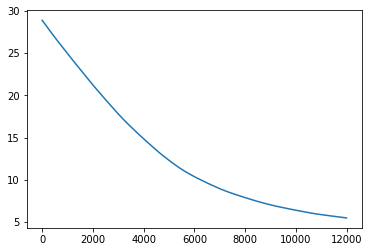

In [12]:
%run 6.15.py

6.16

In [ ]:
# %load 6.16.py
import numpy as np
import matplotlib.pyplot as plt;
# data input
csvname = '3d_classification_data_v2_mbalanced.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:]

#print(np.shape(x))
#print(np.shape(y))

s=x.shape[1]
r=np.ones([1,s])
x=np.mat(np.r_[r,x])
#print(x.shape)
w=np.ones([1,x.shape[0]])
iterations=5
ite=np.zeros(iterations)
cost=np.zeros(iterations)

def weights(y,beta):
    weight=[]
    for i in range(np.size(y)):
        if y[0,i]<0:
            weight.append(1)
        else:
            weight.append(beta)
    return weight

def softmax(w,weight):
    cost=0
    for i in range(np.size(y)):
        temp = np.matmul(w, x[:,i])

        temp1=np.log(1+np.exp(-y[0,i]*temp))

        cost=cost+weight[i]*temp1
    return cost/float(np.size(y))



def Gradient(w,weight):
    vector = np.zeros([x.shape[0], 1])
    for i in range(np.size(y)):
        temp = np.exp(-y[0, i] * np.dot(w, x[:, i]))
        temp1 = weight[i]*temp / (1 + temp) * y[0, i]
        # print(temp1)
        vector = vector + temp1[0,0] * x[:, i]

    return -vector/float(np.size(y))

def Hessian(w,weight):
    Hes=np.zeros([x.shape[0],x.shape[0]])
    for i in range(np.size(y)):
        temp=1+np.exp(y[0, i] * np.dot(w, x[:, i]))
        temp1=weight[i]*(1/temp)*(1-1/temp)
        Hes=Hes+temp1[0,0]*np.matmul(x[:,i],x[:,i].T)

    return Hes/float(np.size(y))

def NMIte(w,weight,iterations):
    for i in range(iterations):

        ite[i]=i
        Hes=Hessian(w,weight)
        grad=Gradient(w,weight)
        a=np.matmul((np.linalg.inv(Hes)),grad)
        w=w-a.T
        cost[i]=softmax(w,weight)
    return w

weight=weights(y,5)
w_1=NMIte(w,weight,iterations)
#print(w_1)
yPre=np.matmul(w_1,x)
wrong=0
#print(yPre)
for i in range(np.size(y)):
    if y[0,i]>0 and yPre[0,i]<0:
        wrong=wrong+1



#print(cost)
print('beta=',5,'Wrong Prediction:',wrong)
plt.plot(ite,cost)
plt.show()

beta= 5 Wrong Prediction: 1


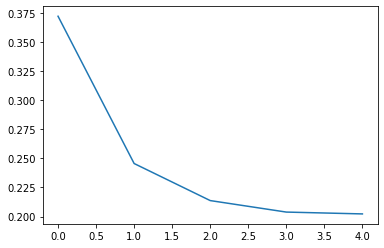

In [18]:
%run 6.16.py

beta= 10 Wrong Prediction: 0


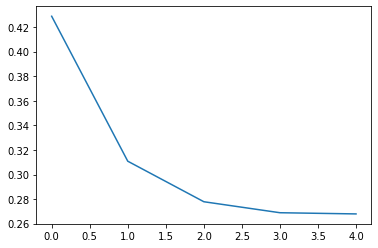

In [19]:
%run 6.16.py